<a href="https://colab.research.google.com/github/navas604/Statistical-Learning-II/blob/main/Practica%201%20-%20K-Means%20Y%20GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Statistical Learning II**
## **Antonio Everardo Navas Contreras, 14003163**
## **19/07/2021**

---

## **PRÁCTICA 1 - K-MEANS Y GMM**

---

### CARGAR LIBRERIAS

In [37]:
# Importar las librerías que se utilizarán

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.mixture import GaussianMixture

### CARGAR, PREPARAR Y EXPLORAR EL DATASET

In [13]:
dataset = pd.read_csv("estaturasCSV.csv")

In [14]:
dataset.head()

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


In [15]:
dataset.shape

(46, 2)

In [16]:
dataset.describe()

,Estatura(metros),Edad(años)
count,46.000000,46.000000
mean,1.732609,29.521739
std,0.075349,6.708996
min,1.550000,21.000000
25%,1.685000,25.000000
50%,1.730000,27.500000
75%,1.777500,32.750000
max,1.900000,53.000000


In [17]:
# Validar los tipos de variables

dataset.dtypes

Estatura(metros)    float64
Edad(años)            int64
dtype: object

In [18]:
# Porporción de NaN por columna

dataset.isna().sum() / len(dataset)

Estatura(metros)    0.0
Edad(años)          0.0
dtype: float64

### Hard-Clustering con K-means (no usar sklearn)

In [20]:
# Función que calcula Clusters y Centroides utilizando K means

def k_means(k, dataset):

  m = dataset.shape[0]  # Numero de Observaciones
  n = dataset.shape[1]  # Numero de Features
  n_iter = 100          # Numero de iteraciones
  clusters = {}         # Inicializar los clusters

  centroids = np.array([]).reshape(n,0)     # Inicializar los centroides

  for i in range(k):
    random_centroids = random.randint(0, m-1)
    centroids = np.c_[centroids, dataset.iloc[random_centroids]]

  # Iterar los centroides hasta convergencia
  for i in range(n_iter):
    dist = np.array([]).reshape(m, 0)
    for i in range(k):
      temp_dist = np.sum((dataset - centroids[:,i])**2, axis=1)
      dist = np.c_[dist, temp_dist]
    min_dist_index = np.argmin(dist, axis=1) + 1

    clusters = {}
    for i in range(k):
      clusters[i+1] = np.array([]).reshape(n,0)

    for i in range(m):
      clusters[min_dist_index[i]] = np.c_[clusters[min_dist_index[i]], dataset.iloc[i]]
        
    for i in range(k):
      clusters[i+1] = clusters[i+1].T
        
    for i in range(k):
      centroids[:,i] = np.mean(clusters[i+1],axis=0)

  return(clusters, centroids)

In [104]:
# Función para graficar la data separada en clusters

def plot_clustered_data(clusters, centroids):
  color = ["blue", "green", "cyan", "magenta", "pink", "yellow"]
  labels = ["cluster1", "cluster2", "cluster3", "cluster4" , "cluster5", "cluster6"]
  for i in range(k):
      plt.scatter(clusters[i+1][:,0], clusters[i+1][:,1], c=color[i], label=labels[i])
  plt.scatter(centroids[0,:], centroids[1,:], s=300, c="red", label="Centroids")
  plt.xlabel("Estatura")
  plt.ylabel("Edad")
  plt.title("CLUSTERED DATA")
  plt.legend()
  plt.show()

array([[ 1.7825    ,  1.712     ,  1.73666667],
       [46.25      , 32.66666667, 25.2962963 ]])

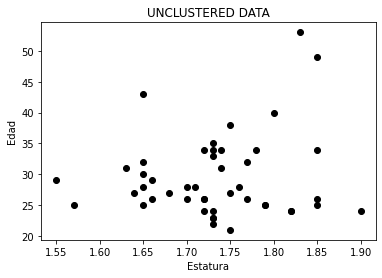

In [19]:
# Gráfica de data sin cluster

plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c="black")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("UNCLUSTERED DATA")
plt.show()

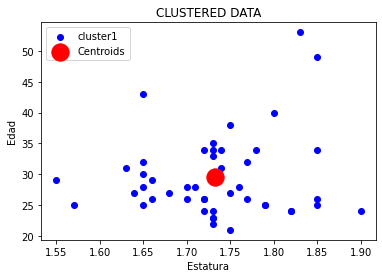

In [31]:
k = 1   # Numero de Clusters

clusters, centroids = k_means(k, dataset)
plot_clustered_data(clusters, centroids)

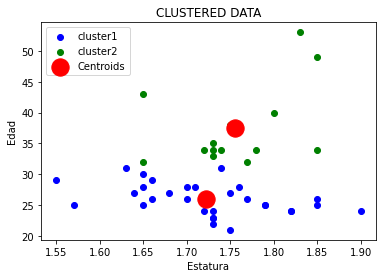

In [32]:
k = 2   # Numero de Clusters

clusters, centroids = k_means(k, dataset)
plot_clustered_data(clusters, centroids)

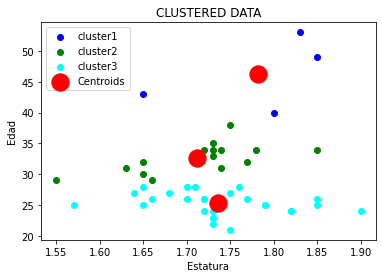

In [33]:
k = 3   # Numero de Clusters

clusters, centroids = k_means(k, dataset)
plot_clustered_data(clusters, centroids)

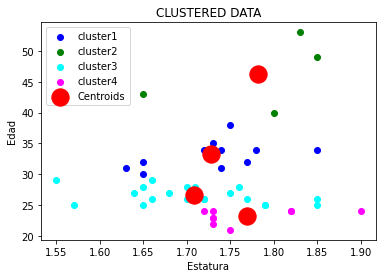

In [34]:
k = 4   # Numero de Clusters

clusters, centroids = k_means(k, dataset)
plot_clustered_data(clusters, centroids)

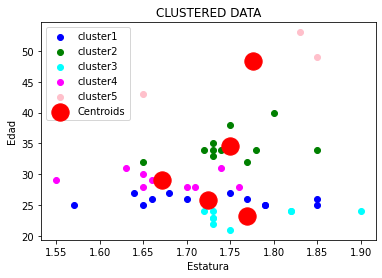

In [35]:
k = 5   # Numero de Clusters

clusters, centroids = k_means(k, dataset)
plot_clustered_data(clusters, centroids)

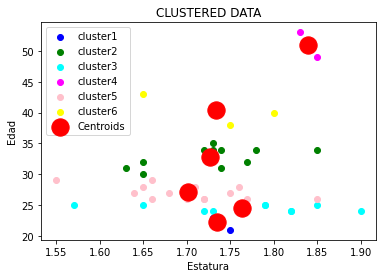

In [80]:
k = 6   # Numero de Clusters

clusters, centroids = k_means(k, dataset)
plot_clustered_data(clusters, centroids)

### Soft-clustering con GMM usando sklearn(sklearn.mixture.GaussianMixture)

In [86]:
# Función para graficar la data separada en clusters

def plot_clustered_data_GMM(gmm, dataset):
  clusters = gmm.predict(dataset)
  labels = ["cluster1", "cluster2", "cluster3", "cluster4" , "cluster5", "cluster6"]
  plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=clusters)
  plt.scatter(gmm.means_[:,0], gmm.means_[:,1], s=300, c="red", label="Centroids")
  plt.xlabel("Estatura")
  plt.ylabel("Edad")
  plt.title("CLUSTERED DATA WITH GMM")
  plt.legend()
  plt.show()

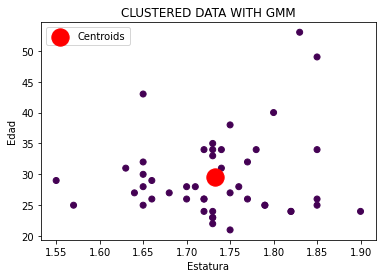

In [87]:
k = 1   # Numero de Clusters

gmm = GaussianMixture(n_components=k, random_state=0).fit(dataset)

plot_clustered_data_GMM(gmm, dataset)

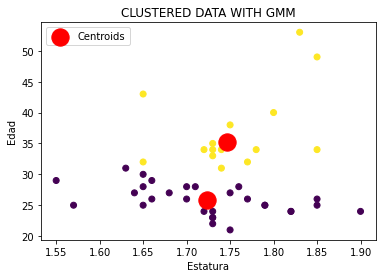

In [88]:
k = 2   # Numero de Clusters

gmm = GaussianMixture(n_components=k, random_state=0).fit(dataset)

plot_clustered_data_GMM(gmm, dataset)

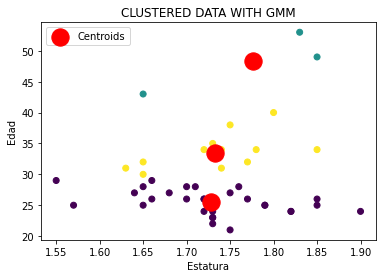

In [89]:
k = 3   # Numero de Clusters

gmm = GaussianMixture(n_components=k, random_state=0).fit(dataset)

plot_clustered_data_GMM(gmm, dataset)

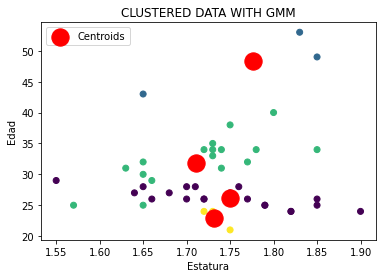

In [90]:
k = 4   # Numero de Clusters

gmm = GaussianMixture(n_components=k, random_state=0).fit(dataset)

plot_clustered_data_GMM(gmm, dataset)

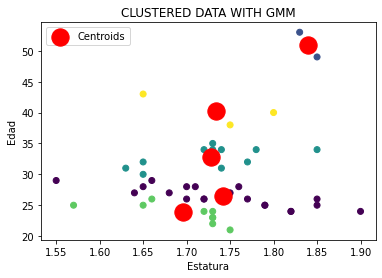

In [91]:
k = 5   # Numero de Clusters

gmm = GaussianMixture(n_components=k, random_state=0).fit(dataset)

plot_clustered_data_GMM(gmm, dataset)

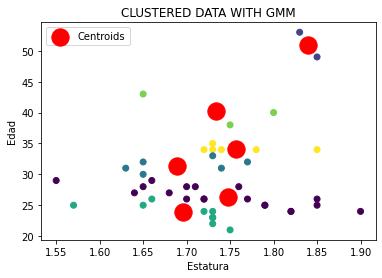

In [92]:
k = 6   # Numero de Clusters

gmm = GaussianMixture(n_components=k, random_state=0).fit(dataset)

plot_clustered_data_GMM(gmm, dataset)

### ANALIZAR METODO DEL CODO

In [158]:
WCSS_array = np.array([])
k_max = 10

for i in range(1,k_max):
    clusters, centroids = k_means(i, dataset)
    WCSS = 0
    for j in range(i):
        WCSS += (1/len(dataset))*(np.sum((clusters[j+1][:,0] - centroids[0,:][j])**2))
    WCSS_array=np.append(WCSS_array, WCSS)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


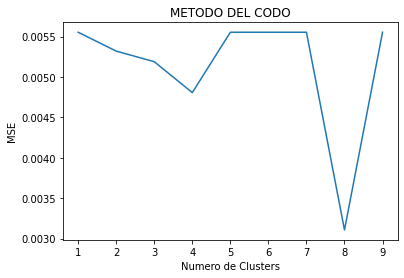

In [159]:
k_array = np.arange(1, k_max, 1)
plt.plot(k_array, WCSS_array)
plt.xlabel("Numero de Clusters")
plt.ylabel("MSE")
plt.title("METODO DEL CODO")
plt.show()

### CONCLUSIONES

*   Analizando el centroide de cada cluster podemos concluir que no es posible asignar una categoría a cada cluster, ya que las distancias entre cada observación y su cluster son muy similares con otros clusters, es decir, las observaciones no están lo suficientemente separadas de los clusters a los que no pertenecen.

*   La varianza intra-cluster es muy parecida a la varianza inter-cluster, por lo que crear categorías se complica, lo que se busca al hacer clustering es minimizar la varianza intra-cluster y maximizar la varianza inter-cluster.

*   El método del codo no resulta ser tan adecuado en este problema ya que es ambiguo, se debe buscar un método más objetivo para determinar el valor óptimo de k.
